In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import torch
from data_utils import get_accept_list
# from torchvisions
import argparse

/home/rachel/anaconda3/envs/ornet/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
from platform import node
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, random_split
import pytorch_lightning as pl
from pytorch_lightning.strategies.ddp import DDPStrategy # set ddps flag
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks.early_stopping import EarlyStopping


import os
import math
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import WeightedRandomSampler
from torchvision import transforms
import torchvision
from torch.optim import Adam, SGD, AdamW
from torch.nn import CrossEntropyLoss
import pickle

from data_utils import FramePairDataset, RoiTransform, get_accept_list, TimeChunks
from models import BaseCNN, ResNet18, ResBlock, CNN_Encoder
from lightning_modules import CNN_Module
from sklearn.metrics import confusion_matrix
import numpy as np
from parsing_utils import make_parser

from matplotlib import pyplot as plt
import pickle
from tqdm import tqdm
from time import sleep

import albumentations as A
from albumentations.pytorch import ToTensorV2
import copy
import pandas as pd
import random
from torch.utils.tensorboard import SummaryWriter
from itertools import product

from sklearn.model_selection import train_test_split

In [3]:
X, y = get_accept_list("/data/ornet/gmm_intermediates", ['control', 'mdivi', 'llo'])
# print("X, Y", X, y)

# why would there be a y? 
frames_per_chunk = 5
resize=224

# args.epochs=10

step = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=39)
# transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
transform = transforms.Compose([transforms.ToTensor(),transforms.Resize(size=resize)])
# transform = transforms.Compose([transforms.ToTensor(),transforms.Resize(size=resize), transforms.Normalize()])
# TODO - some sort of normalizing step?
# transform = transforms.Compose([ transforms.ToTensor(), transforms.Resize(size=224), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
train_dataset = TimeChunks('/data/ornet/rachel_baselines', accept_list=X_train, frames_per_chunk=frames_per_chunk, step=step, transform=transform)  
test_dataset = TimeChunks('/data/ornet/rachel_baselines', accept_list=X_test, frames_per_chunk=frames_per_chunk, step=step,  transform=transform)  
val_dataset = TimeChunks('/data/ornet/rachel_baselines', accept_list=X_val, frames_per_chunk=frames_per_chunk,step=step,   transform=transform)  

train_loader = DataLoader(train_dataset,sampler=None, batch_size=1)
test_loader = DataLoader(test_dataset,sampler=None, batch_size=1)
val_loader = DataLoader(val_dataset,sampler=None, batch_size=1)
# test_dataloader = val_dataloader


/data/ornet/rachel_baselines
/data/ornet/rachel_baselines
/data/ornet/rachel_baselines


In [27]:
y_val

['mdivi', 'llo', 'llo', 'llo', 'mdivi', 'llo', 'mdivi', 'llo', 'llo']

In [ ]:
model = CnnLSTM_Module(number_of_frames=time_steps, num_classes =2, learning_rate= args.lr, weight_decay=args.weight_decay, label='best-oct27')
        # model = CNN_Module(number_of_frames=time_steps, num_classes =2, learning_rate= args.lr, weight_decay=args.weight_decay, label= "e-5")
trainer = pl.Trainer(accelerator="gpu", devices=1, num_nodes=1)

        # trainer.test(model=model, dataloaders=test_dataloader)


In [4]:
m = [1 for m in val_dataset if m[1] == 0]
print(sum(m))

l = [1 for m in val_dataset if m[1] == 1]
print(sum(l))
# co = [1 for m in y_test if m == 'control']
# print(sum(co))

141
117


In [5]:
m = [1 for m in train_dataset if m[1] == 0]
print(sum(m))

l = [1 for m in train_dataset if m[1] == 1]
print(sum(l))

861
975


In [6]:
m = [1 for m in test_dataset if m[1] == 0]
print(sum(m))

l = [1 for m in test_dataset if m[1] == 1]
print(sum(l))
# co = [1 for m in y_test if m == 'control']
# print(sum(co))

127
117


In [7]:
path =  'best-oct21_'
with open("../embeddings/" + path+ "embeddings.pkl", "rb") as fp:   # Unpickling
    embeddings = pickle.load(fp)

with open("../embeddings/"+ path +"targets.pkl", "rb") as fp:   # Unpickling
    targets = pickle.load(fp)


with open("../embeddings/"+ path +"preds.pkl", "rb") as fp:   # Unpickling
    preds = pickle.load(fp)




In [8]:
len(c)

NameError: name 'c' is not defined

In [ ]:
preds

[tensor([[0.6096, 0.3904],
         [0.4601, 0.5399],
         [0.6467, 0.3533],
         [0.5658, 0.4342],
         [0.4652, 0.5348],
         [0.5448, 0.4552],
         [0.5276, 0.4724],
         [0.3783, 0.6217],
         [0.5228, 0.4772],
         [0.5413, 0.4587],
         [0.3834, 0.6166],
         [0.5892, 0.4108],
         [0.6107, 0.3893],
         [0.6167, 0.3833],
         [0.5375, 0.4625],
         [0.5792, 0.4208]]),
 tensor([[0.5351, 0.4649],
         [0.4722, 0.5278],
         [0.6039, 0.3961],
         [0.3862, 0.6138],
         [0.3640, 0.6360],
         [0.4737, 0.5263],
         [0.4276, 0.5724],
         [0.6500, 0.3500],
         [0.5114, 0.4886],
         [0.6609, 0.3391],
         [0.4110, 0.5890],
         [0.4888, 0.5112],
         [0.5839, 0.4161],
         [0.5206, 0.4794],
         [0.5161, 0.4839],
         [0.4255, 0.5745]]),
 tensor([[0.6345, 0.3655],
         [0.3994, 0.6006],
         [0.5124, 0.4876],
         [0.4295, 0.5705],
         [0.4630, 0.5370

In [ ]:
print(type(b))


<class 'list'>


In [9]:
print(type(b[0]))

NameError: name 'b' is not defined

In [10]:
preds[0]

tensor([[0.5618, 0.4382],
        [0.5789, 0.4211],
        [0.5666, 0.4334],
        [0.5114, 0.4886],
        [0.5861, 0.4139],
        [0.4833, 0.5167],
        [0.6736, 0.3264],
        [0.2234, 0.7766],
        [0.6704, 0.3296],
        [0.5947, 0.4053],
        [0.6171, 0.3829],
        [0.5151, 0.4849],
        [0.6394, 0.3606],
        [0.3230, 0.6770],
        [0.6084, 0.3916],
        [0.5014, 0.4986]])

In [11]:
xs = []
ys = []
zs = []
labels = []
m = ['^', 'o', 'x']
p = []

for batch in embeddings:
    batch = batch.permute(1,0)
    # print(batch.shape)
    xs.extend(batch[0].numpy())
    ys.extend(batch[1].numpy())
    # zs.extend(batch[2].numpy())

for batch in targets:
    # batch = batch.permute(1,0)
    # print(batch.shape)
    labels.extend(batch.numpy())

for batch in preds:
    # print(batch.shape)
    # batch = batch.permute(1,0)
    for fuc in batch: 
        fuc = fuc.argmax(axis=0)
     
        p.append(fuc.item())
   

# colors = ['red','blue','purple']
colors = ['red','blue']

# ?

# print(p)


In [12]:
L = np.array(labels)
P = np.array(p)
acc = np.sum(L == P) / len(p)
acc


# ???? no way
# is 0 a good guess... 

0.86875

In [13]:
len([a for a in P if  a == 1])

61

In [14]:
len(P)

160

In [15]:
len(L)

160

In [16]:
p[-1] == labels[-1]
# p[-1]
# labels[-1]

True

In [17]:
# I dont think the weights are mixed right...
arr = np.arange(9).reshape((3, 3))
print(arr)
np.random.permutation(arr)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[6, 7, 8],
       [0, 1, 2],
       [3, 4, 5]])

In [18]:
p

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [19]:
len(xs)

160

In [20]:
len(ys)


160

In [21]:
preds

[tensor([[0.5618, 0.4382],
         [0.5789, 0.4211],
         [0.5666, 0.4334],
         [0.5114, 0.4886],
         [0.5861, 0.4139],
         [0.4833, 0.5167],
         [0.6736, 0.3264],
         [0.2234, 0.7766],
         [0.6704, 0.3296],
         [0.5947, 0.4053],
         [0.6171, 0.3829],
         [0.5151, 0.4849],
         [0.6394, 0.3606],
         [0.3230, 0.6770],
         [0.6084, 0.3916],
         [0.5014, 0.4986]]),
 tensor([[0.6962, 0.3038],
         [0.5623, 0.4377],
         [0.6754, 0.3246],
         [0.6317, 0.3683],
         [0.3413, 0.6587],
         [0.6124, 0.3876],
         [0.4018, 0.5982],
         [0.4375, 0.5625],
         [0.4580, 0.5420],
         [0.5987, 0.4013],
         [0.6811, 0.3189],
         [0.5165, 0.4835],
         [0.5439, 0.4561],
         [0.5643, 0.4357],
         [0.6115, 0.3885],
         [0.5969, 0.4031]]),
 tensor([[0.4228, 0.5772],
         [0.6019, 0.3981],
         [0.4640, 0.5360],
         [0.6938, 0.3062],
         [0.2437, 0.7563

In [22]:
P

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0])

In [23]:
L

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0])

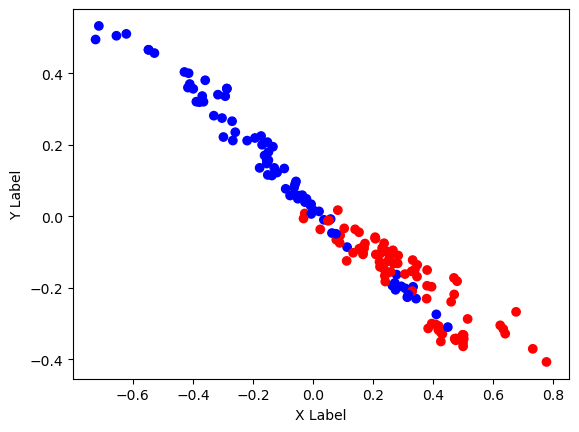

In [24]:
np.random.seed(42)
fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot()
ax.scatter(xs, ys, c=labels, cmap=matplotlib.colors.ListedColormap(colors))

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
# ax.invert_yaxis()

plt.show()
#'/home/rachel/ornet/tb_logs/ batch_size = 16 lr = 1e-05 shuffle = True epochs = 30 wd = 0.1 frames=10 resnet18 - steps =1/version_0/checkpoints/epoch=6-step=224.ckpt'
# path =  ' batch_size = 4 lr = 1e-05 wd = 0 frames=5 resnet18-kornia_'

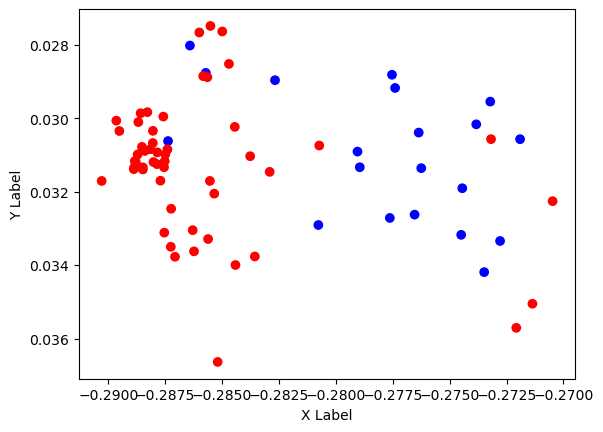

In [10]:
np.random.seed(42)
fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot()
ax.scatter(xs, ys, c=labels, cmap=matplotlib.colors.ListedColormap(colors))

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
ax.invert_yaxis()

plt.show()
# I dont remember what this one was... the three? dont need to separate far.

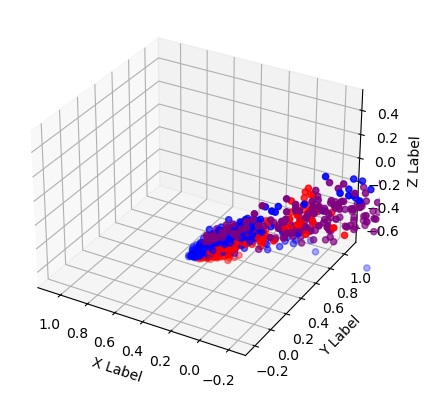

In [38]:
np.random.seed(42)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs, ys, zs, c=labels, cmap=matplotlib.colors.ListedColormap(colors))

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.invert_yaxis()

plt.show()
